# Automating browser actions
Sometimes you can't scrape all the data without interacting with the web page.

## Paging
Take a look at this web site:

https://books.toscrape.com/

Notice how the data is paged.  

You can only scrape the entire list of books by clicking on the "next" button repeatedly.




## Scrolling
Take a look at this web site:

https://www.reddit.com/r/news/

View the developer console and locate the HTML code for the content of the page (you can select the arrow in Chrome and click on a page element):

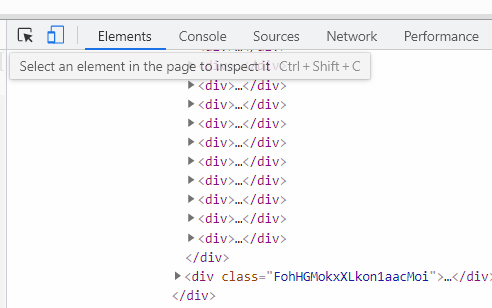

Notice how only a few articles are shown (there are around 30 div elements containing the articles).

Now start scrolling in the browser window.  You will notice new div tags appearing.

You can only scrape the articles lower down in the page by scrolling the page.


## Selenium
Selenium is a browser automation tool.  It can be used to test applications, but is also useful for web scraping as it allows you to simulate browser actions such as clicking buttons, scrolling and entering form data.

Selenium uses Chrome Driver, which effectively gives you a programmable version of Chrome.

Download the latest version of chromedriver: https://chromedriver.chromium.org/

## Paging with Selenium
In this example we will use Selenium to "click" on the next button in the Books to Scrape website.

In [13]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from time import sleep
from random import random

In [14]:
# Create the programmable browser
browser = webdriver.Chrome(executable_path="C:\\Users\\llewe\\Desktop\\tidy\\chromedriver")

In [15]:
# Extract the books, page by page
currentPage = 1
maxPages = 5
done = False
url = "https://books.toscrape.com/"

while currentPage <= maxPages:
    # Add a random wait time so we don't overload the website and we don't look like a bot
    sleep(random()*3)
    
    # Load the page
    print("Loading", url)
    browser.get(url)

    # Find the location of the list of books
    books = browser.find_element(By.TAG_NAME, "ol").find_elements(By.TAG_NAME, "li")
    
    # Extract all the books
    for book in books:
        title = book.find_element(By.TAG_NAME, "h3").find_element(By.TAG_NAME, "a").get_attribute("title")
        print("\t", title)
    
    # "Click" the next button
    nextButton = browser.find_element(By.CLASS_NAME, "next")
    currentPage += 1
    url = nextButton.find_element(By.TAG_NAME, "a").get_attribute("href")



Loading https://books.toscrape.com/
	 A Light in the Attic
	 Tipping the Velvet
	 Soumission
	 Sharp Objects
	 Sapiens: A Brief History of Humankind
	 The Requiem Red
	 The Dirty Little Secrets of Getting Your Dream Job
	 The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
	 The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
	 The Black Maria
	 Starving Hearts (Triangular Trade Trilogy, #1)
	 Shakespeare's Sonnets
	 Set Me Free
	 Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
	 Rip it Up and Start Again
	 Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
	 Olio
	 Mesaerion: The Best Science Fiction Stories 1800-1849
	 Libertarianism for Beginners
	 It's Only the Himalayas
Loading https://books.toscrape.com/catalogue/page-2.html
	 In Her Wake
	 How Music Works
	 Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Gui

## Scrolling with Selenium

In [16]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from time import sleep
from random import random

In [17]:
# Create the programmable browser
browser = webdriver.Chrome(executable_path="C:\\Users\\llewe\\Desktop\\tidy\\chromedriver")

In [18]:
# Extract the articles by scrolling
currentPage = 1
maxPages = 10
done = False
url = "https://www.reddit.com/r/news/"

# Load the page
print("Loading", url)
browser.get(url)
    
while currentPage <= maxPages:
    print("Page", currentPage)
    
    # Add a random wait time so we don't overload the website and we don't look like a bot
    sleep(random()*3)
    
    # Scroll down the height of the page
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    currentPage += 1

    
# Now we have all the pages, extrac the titles
articles = browser.find_elements(By.TAG_NAME, "h3")
for article in articles:
    print(article.get_attribute("innerHTML"))

  

Loading https://www.reddit.com/r/news/
Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Deloitte tells staff they can work from home forever
Welcome to: making the most of your passion project, uninterrupted teamwork, all the tools in one toolbox, and the ultimate creative companion. With unlimited downloads of Adobe Stock standard assets – Creative Cloud Pro Edition takes projects from endless obstacles to totally possible.
Capitol police officer Eugene Goodman to throw first pitch at Nationals game
Texas thermostats adjusted remotely during heat wave residents claim
Montreal police filmed kneeling on Black teen's neck, prompting calls for investigation | CBC News
Judge: No car show trip for man arrested in Capitol riot
Police smashed their living room window with an armoured vehicle in a drug raid that found nothing | CBC News
Ottawa police open tip line into possible serial cat killer; so far five dead cats have been found, showing human signs of abuse
Rhode Is